# Taller Fourier EDM - Clasificación de cargas de electrodomésticos

## Práctica 1 - Señales de medida de Intensidad de corriente (I) y de Voltaje (V) de diversas cargas

### Objetivos:
En esta práctica se trabaja con señales de medida de intensidad de corriente y voltaje de distintos tipos de electrodomésticos. Se busca entender la relación de las señales con los distintos tipos de cargas y ganar intuición en las características que podrían permitir discriminar dichas cargas. 

### Actividades
1. Visualización de señales V e I
2. Comparación de ciclos para las distintas señales
3. Análisis de señales en frecuencia. Transformada de Fourier, Espectrograma. Armónicos
4. Cálculo de potencia 
5. Identificación de agrupamiento de cargas en el espacio de características

### Materiales

Se usa una base de referencia de señales V-I correspondiente a once tipos distintos de electrodomésticos ('Air Conditioner', 'Compact Fluorescent Lamp', 'Fan', 'Fridge', 'Hairdryer', 'Heater', 'Incandescent Light Bulb', 'Laptop', 'Microwave', 'Vacuum', 'Washing Machine'). La base está disponible en http://www.plaidplug.com/, [1].

Las señales, de 2 a 5 segundos de duración, están en archivos ".csv" donde la primera columna es la intensidad y la segunda columna es el voltaje.  
La frecuencia de línea de las señales es $F_l=60Hz$.  
La frecuencia de muestreo de las señales es $F_s=30kHz$.

[1] Gao, Jingkun, et al. "Plaid: a public dataset of high-resoultion electrical appliance measurements for load identification research: demo abstract." proceedings of the 1st ACM Conference on Embedded Systems for Energy-Efficient Buildings. ACM, 2014.

### Datos

La base de datos PLAID se baja de  http://www.plaidplug.com/.  

El archivo "meta1_simple.csv" en la carpeta "data" tiene tres columnas con la información sobre las señales de los electrodomésticos.   
Columnas:  
* [id]    identificador del electrodoméstico
* [tipo]  tipo del electrodoméstico
* [casa]  identificador de la casa donde se registró la señal

Los electrodomésticos son  [tipo, nombre]:  
* 0: 'Air Conditioner',
* 1: 'Compact Fluorescent Lamp',
* 2: 'Fan',
* 3: 'Fridge',
* 4: 'Hairdryer',
* 5: 'Heater',
* 6: 'Incandescent Light Bulb',
* 7: 'Laptop',
* 8: 'Microwave',
* 9: 'Vacuum',
* 10: 'Washing Machine'

Por ejemplo, las señales I,V en el archivo '10.csv' corresponde al electrodoméstico con id=10, tipo=8 (Microwave) y de la casa=1.

### Trabajo a realizar

A lo largo del notebook encontrarán las siguientes palabras claves:

* \# COMPLETAR  -> indica que se requiere completar el código. 
  
  
* \# EXPERIMENTAR -> indica que la celda contiene código funcional que permite experimentar variando el tipo de electrodoméstico, parámetros de las funciones, etc. Es posible, si lo requiere la experimentación duplicar la celda y realizar los cambio que sean de interés en el código.
  
  
* \# DISCUTIR -> se espera una discusión de los experimentos realizados y/o de las preguntas formuladas
  
  
  
* \# RESPONDER -> se espera una respuesta a preguntas concretas


In [1]:
import os
import numpy as np
import pandas as pd
from scipy.fftpack import fft, fftshift, ifft
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

#estilo de las gráficas
plt.style.use('ggplot')


# graficas en línea  entre las celdas
#%matplotlib inline 
# graficas en línea  entre las celdas con pan/zoom
%matplotlib notebook
# graficas en ventanas externas
# %matplotlib




## Parte 1 - Carga de los datos

In [2]:
frecuencia_muestreo = 30000 #Frecuencia de muestreo en Hz
frecuencia_linea = 60    #Frecuencia de línea en Hz
muestras_por_ciclo = int(frecuencia_muestreo/frecuencia_linea)

nombres_electrodomesticos = ['Air Conditioner', 
                         'Compact Fluorescent Lamp',
                         'Fan',
                         'Fridge',
                         'Hairdryer',
                         'Heater',
                         'Incandescent Light Bulb',
                         'Laptop',
                         'Microwave',
                         'Vacuum',
                         'Washing Machine']

nombres_abreviados_electrodomesticos = ['AirC','CFL','Fan','Frid','Hair','Heat','ILB','Lapt','MWave','Vacc','Wash']

# ubicación del directorio  de la base PLAID que contiene los ".csv"
PLAID_csv_directory = "C:/Users/carlos/Downloads/PLAID/CSV" # COMPLETAR  con el camino al directorio que contiene los ".csv"

# archivo con la metadata
archivo_metadata = './data/meta1_simple.csv'

### 1.1 Completar las funciones de carga de meta-datos 

In [3]:
def cargar_metadata():
    '''
    Carga la informacion del archivo "meta1_simple.csv" a la variable metadata
    '''
    # COMPLETADO
    ##metadata = np.genfromtxt(archivo_metadata, dtype="int", delimiter=",", skip_header=1) 
    dataframe = pd.read_csv(archivo_metadata)
    metadata = dataframe.to_numpy()
    return metadata


#------------------------------------------------------------------------------
# Todas las funciones 'get' suponen la pre-existencia de la variable 'metadata'
#------------------------------------------------------------------------------

def get_cantidad_electrodomesticos():
    '''Devuelve la cantidad de electrodomésticos en la base'''
    # COMPLETADO
    return len(cargar_metadata())

def get_tipo(id_electrodomestico):
    '''Devuelve el tipo de electrodoméstico'''
    # COMPLETADO
    auxDic = dict(cargar_metadata()[:,0:2])
    return auxDic[id_electrodomestico]

def get_casa(id_electrodomestico):
    '''Devuelve la casa del electrodoméstico'''
    # COMPLETADO
    auxDic = dict(cargar_metadata()[:,0:3:2])
    return auxDic[id_electrodomestico]
    
def get_nombre(id_electrodomestico):
    '''Devuelve el nombre del electrodoméstico '''
    # COMPLETADO
    return nombres_electrodomesticos[get_tipo(id_electrodomestico)]
    
def get_nombre_abreviado(id_electrodomestico):
    '''Devuelve el nombre abreviado del electrodoméstico '''
    # COMPLETADO
    return nombres_abreviados_electrodomesticos[get_tipo(id_electrodomestico)]

def get_nombre_archivo(id_electrodomestico):
    '''Devuelve el camino completo al archivo correspondiente al electrodoméstico'''
    # COMPLETADO
    return '{}/{}.csv'.format(PLAID_csv_directory, id_electrodomestico)
    
def get_ids():
    '''Devuelve un array con los ids de todos los electrodomésticos de la base'''
    # COMPLETADO
    return cargar_metadata()[:,0:1]
    
def get_ids_por_tipo(tipo):
    '''Devuelve los ids correspondientes a cierto tipo'''
    # COMPLETADO
    return [cargar_metadata()[a,0] for a in range(len(cargar_metadata())) if cargar_metadata()[a,1]==tipo]

def get_ids_por_casa(casa):
    '''Devuelve los ids correspondientes a cierta casa'''
    # COMPLETADO
    return [cargar_metadata()[a,0] for a in range(len(cargar_metadata())) if cargar_metadata()[a,2]==casa]    

### 1.2 Cargar la metadata

#### IMPORTANTE:  La variable metadata NO será usada directamente a lo largo de práctica. Para todas las partes de la práctica  sólo se usarán las funciones "get" de la parte 1.1 


In [4]:
# no modificar
metadata = cargar_metadata()
# no modificar

### 1.3 Testear las funciones de la parte 1.1

In [5]:
# Testeos
np.random.seed(1234)

print('-------------------------------------------------------------') 
# Imprimir la cantidad de electrodomesticos en la base
print('Cantidad de electrodomésticos en la base:', get_cantidad_electrodomesticos() )

print('-------------------------------------------------------------') 
# Imprimir lista de tipos y nombres
for i in range(len(nombres_electrodomesticos)):
    print('{}:{}'.format(i,nombres_electrodomesticos[i]))

    
print('-------------------------------------------------------------') 
# Imprimir datos de un cierto electrodoméstico
id_elec = 10
print("Id electrodoméstico: {}".format(id_elec) )
print("Archivo: {}".format(get_nombre_archivo(id_elec)) )
print("Tipo: {}:{}".format(get_tipo(id_elec), get_nombre(id_elec)) )
print("Casa: {}".format(get_casa(id_elec)))
print('-------------------------------------------------------------')   


print('-------------------------------------------------------------') 
# Imprimir datos de un cierto tipo de electrodomésticos
#tipo = np.random.choice(len(nombres_electrodomesticos))
tipo = 10
ids = get_ids_por_tipo(tipo)

print('Electrodomésticos tipo {}:{}'.format(tipo, nombres_electrodomesticos[tipo]))
print(ids)

print('Un electrodoméstico de este tipo ---------------')
id_elec = np.random.choice(ids)
print("Id electrodoméstico: {}".format(id_elec) )
print("Archivo: {}".format(get_nombre_archivo(id_elec)) )
print("Tipo: {}:{}".format(get_tipo(id_elec), get_nombre(id_elec)) )
print("Casa: {}".format(get_casa(id_elec)))

print('-------------------------------------------------------------') 
# Imprimir datos de una cierta casa
casa = 17
ids = get_ids_por_casa(casa)

print('Electrodomésticos de la casa {}'.format(casa))
print(ids)




-------------------------------------------------------------
Cantidad de electrodomésticos en la base: 1074
-------------------------------------------------------------
0:Air Conditioner
1:Compact Fluorescent Lamp
2:Fan
3:Fridge
4:Hairdryer
5:Heater
6:Incandescent Light Bulb
7:Laptop
8:Microwave
9:Vacuum
10:Washing Machine
-------------------------------------------------------------
Id electrodoméstico: 10
Archivo: C:/Users/carlos/Downloads/PLAID/CSV/10.csv
Tipo: 8:Microwave
Casa: 1
-------------------------------------------------------------
-------------------------------------------------------------
Electrodomésticos tipo 10:Washing Machine
[80, 185, 186, 187, 188, 189, 488, 489, 490, 491, 492, 531, 532, 533, 534, 535, 620, 621, 622, 623, 624, 625, 845, 906, 1005, 1074]
Un electrodoméstico de este tipo ---------------
Id electrodoméstico: 535
Archivo: C:/Users/carlos/Downloads/PLAID/CSV/535.csv
Tipo: 10:Washing Machine
Casa: 26
--------------------------------------------------

### 1.3 Completar las funciones de carga y visualización de datos

In [6]:
def cargar_VI_por_ciclos(nombre_archivo, 
                         frecuencia_muestreo=30000,
                         frecuencia_linea=60,
                         ciclos_a_cargar=1e100,  #por defecto se cargan todos los ciclos posibles
                         ciclos_a_saltear=0):    #por defecto se carga desde el inicio
    '''
    Carga un cierto numero de ciclos de una señal I,V guardada en un archivo
    Devuelve las señales I y V como  2 arrays Nx1
    
    Importante: se debe asegurar que se carga un número entero de ciclos (el número final
    de ciclos cargados podría eventualmente ser menor a 'ciclos_a_cargar')
    '''
    
    # COMPLETADO
    I = np.genfromtxt(nombre_archivo, delimiter=',')[:, 0:1].flatten()
    V = np.genfromtxt(nombre_archivo, delimiter=',')[:, 1:2].flatten()
    
    muestras_por_ciclo = int(frecuencia_muestreo/frecuencia_linea)
    cantidad_ciclos_completos = int(len(I)/muestras_por_ciclo)
    
    muestra_inicial = int(ciclos_a_saltear*muestras_por_ciclo)
    muestra_final = min(muestra_inicial + int(ciclos_a_cargar*muestras_por_ciclo), cantidad_ciclos_completos*muestras_por_ciclo)
            
    I = I[muestra_inicial:muestra_final]
    V = V[muestra_inicial:muestra_final]    
    
    return I,V


def generar_vector_tiempo(numero_muestras, frecuencia_muestreo=30000):
    '''
    Genera un vector de tiempo del largo solicitado
    '''
    duracion = (numero_muestras-1)/frecuencia_muestreo   #duración de la señal en segundos
    vector_tiempo = np.linspace(0,duracion,numero_muestras)
    
    return vector_tiempo


def graficar_I_V(I, V, frecuencia_muestreo=30000, fignum=None, color = 'g'):
    '''
    Genera un vector de tiempos T adecuado y grafica por separado
    las señales de corriente I(T) y voltaje V(T) que se le pasan.
    Se supone que I y V son de igual largo
    
    Si se le pasa un fignum, grafica I sobre la figura (fignum) y V sobre la 
    figura (fignum+1). De lo contrario crea dos figuras nuevas.
    '''
    
    T = generar_vector_tiempo(len(I), frecuencia_muestreo)
    
    # COMPLETADO
    
    #Grafica corrientes
    plt.figure(fignum)
    plt.plot(T, I, color)
    plt.title("$I = f(t)$")
    plt.xlabel("Tiempo $t$")
    plt.ylabel("Corriente $I$")
    
    #Grafica voltajes
    if(fignum == None):
        plt.figure()
    else:
        plt.figure(fignum + 1)
    plt.plot(T, V, color)
    plt.title("$V = f(t)$")
    plt.xlabel("Tiempo $t$")
    plt.ylabel("Voltaje $V$")
    
def graficar_diagrama_VI(I, V, fignum=None):
    '''
    Grafica I vs. V 
    
    Si se le pasa un fignum, grafica el diagrama sobre la 
    figura (fignum). De lo contrario crea una figuras nueva.
    '''
    if not fignum is None:
        plt.figure(fignum)
    else:
        plt.figure()
        
    plt.plot(V,I,'.-')
    plt.title('Diagrama V-I')
    plt.xlabel('V')
    plt.ylabel('I')
    


### 1.4 Testear las funciones de carga y visualización

Tipo: 1:Compact Fluorescent Lamp


<IPython.core.display.Javascript object>


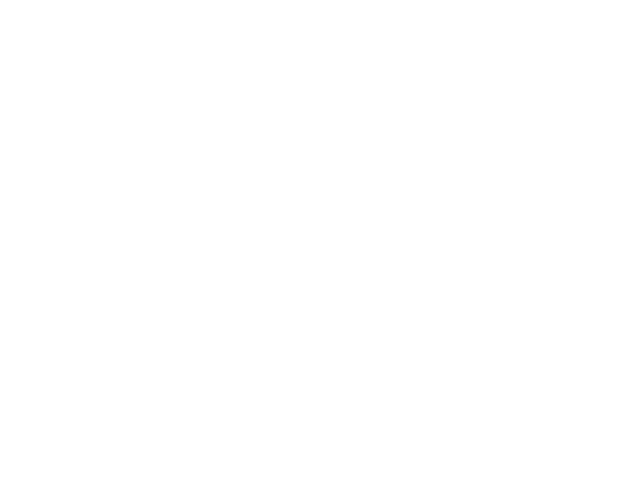

<IPython.core.display.Javascript object>


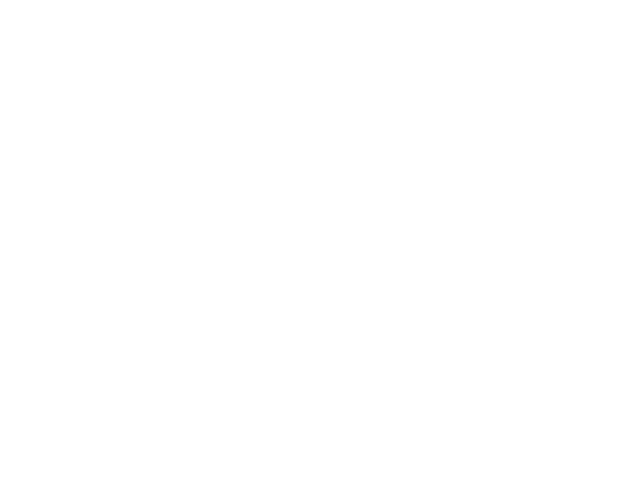

<IPython.core.display.Javascript object>


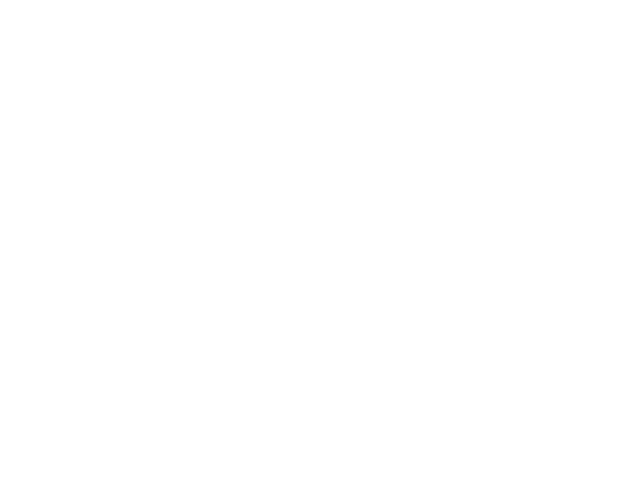

Tipo: 3:Fridge


<IPython.core.display.Javascript object>


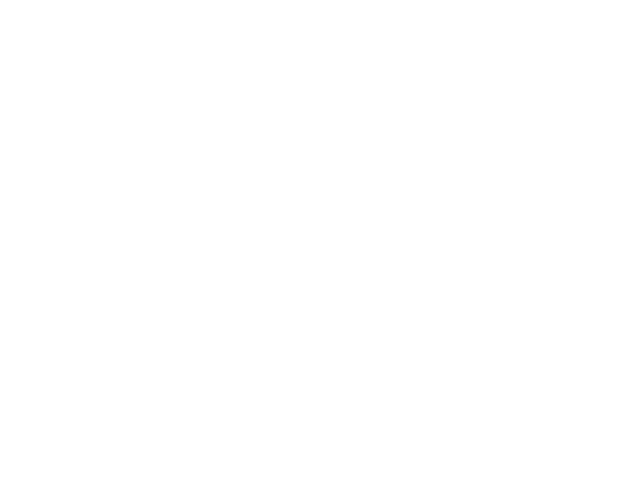

<IPython.core.display.Javascript object>


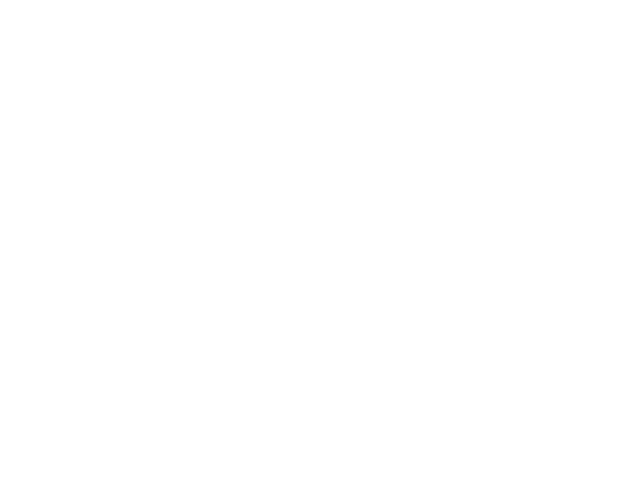

<IPython.core.display.Javascript object>


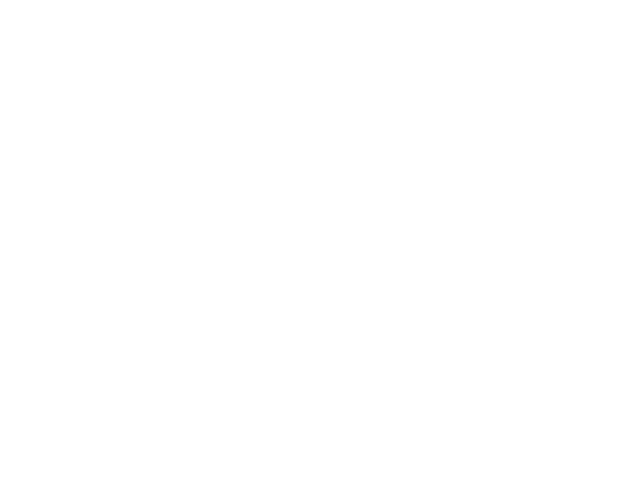

Tipo: 8:Microwave


<IPython.core.display.Javascript object>


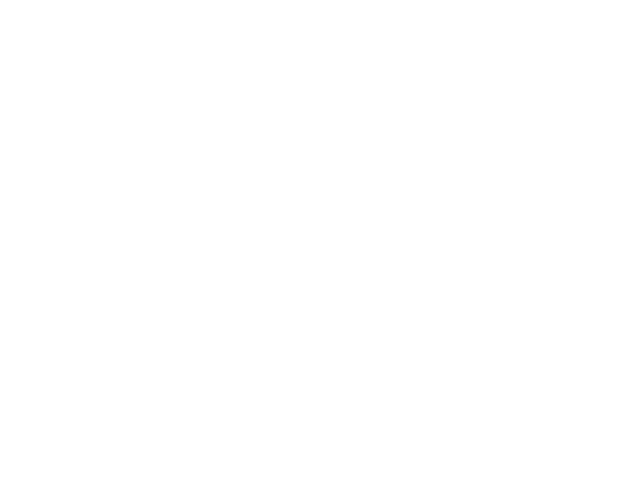

<IPython.core.display.Javascript object>


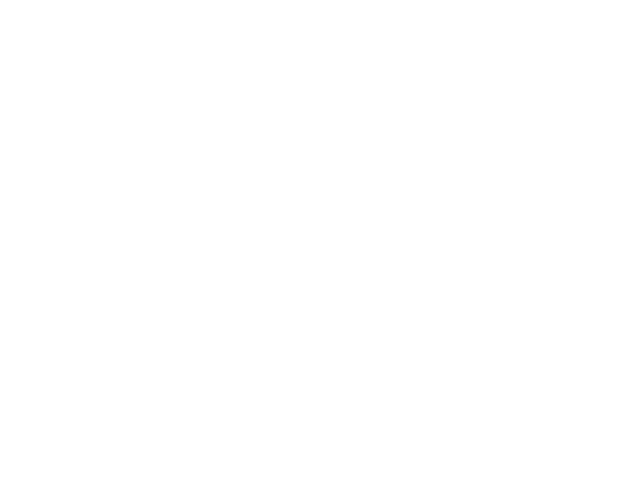

<IPython.core.display.Javascript object>


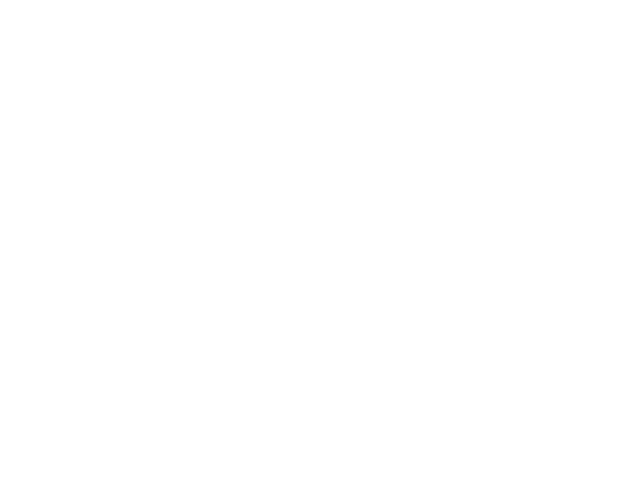

In [7]:
ciclos_a_saltear = 52
ciclos_a_cargar = 3
    
for id_elec in [1,6,10]:
    nombre_de_archivo = get_nombre_archivo(id_elec)

    I,V = cargar_VI_por_ciclos(nombre_de_archivo, 
                               ciclos_a_saltear=ciclos_a_saltear,
                               ciclos_a_cargar = ciclos_a_cargar)
    
    print("Tipo: {}:{}".format(get_tipo(id_elec), get_nombre(id_elec)) )
    graficar_I_V(I,V)
    graficar_diagrama_VI(I,V)


## 2) Promediado de un ciclo
En esta parte de la práctica se busca promediar para obtener una representación del voltaje y la corriente típicas en un ciclo de una cierta carga.   
Para comparar ciclos típicos de distintas cargas se va a alinear el ciclo de manera que la corriente inicie en 0 y ascienda.


### 2.1 Completar las funciones de promediado y alineamiento

<IPython.core.display.Javascript object>


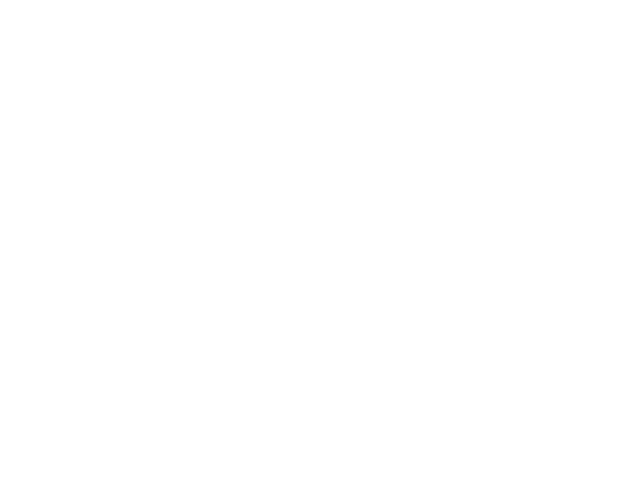

<IPython.core.display.Javascript object>


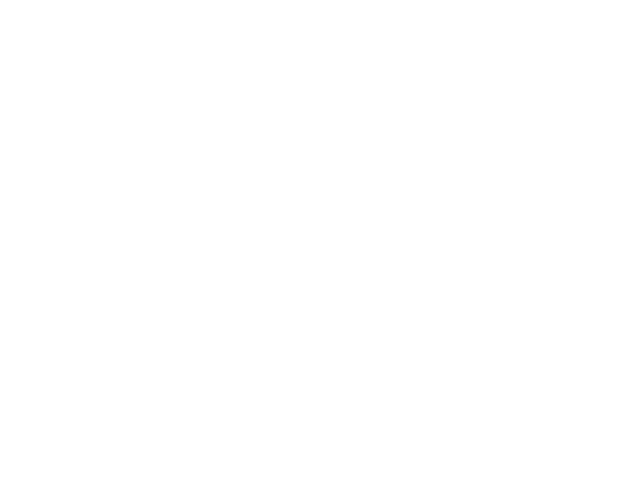

<IPython.core.display.Javascript object>


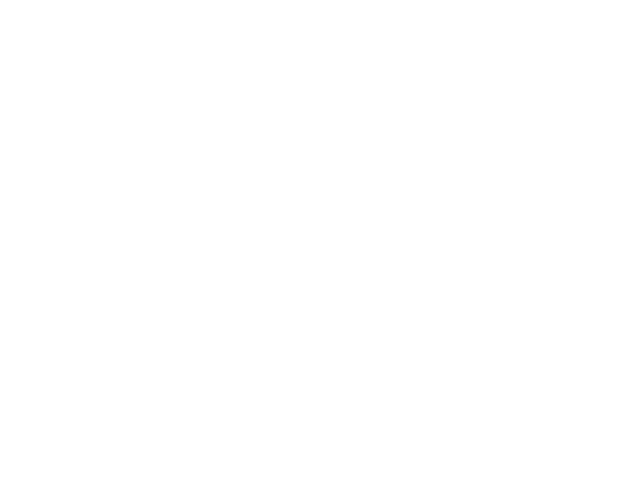

<IPython.core.display.Javascript object>


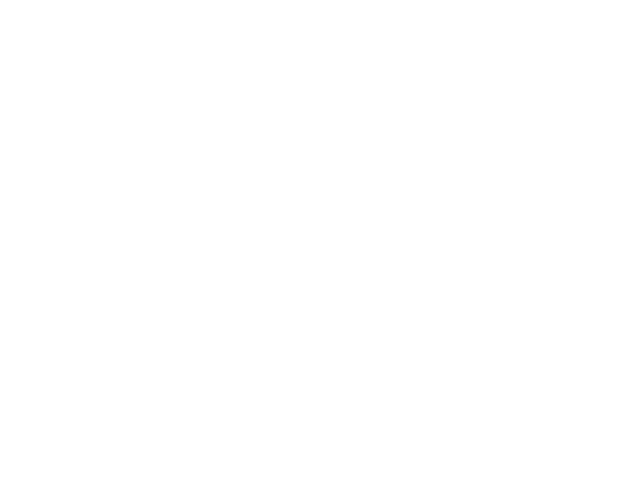

In [8]:

def promediar_ciclos(S, frecuencia_muestreo=30000, frecuencia_linea=60):
    '''
    Promedia los ciclos de la señal S. Si la señal no tiene un número entero de ciclos,
    las muestras del final correspondientes a un ciclo incompleto no se tienen en cuenta
    Devuelve el ciclo promedio.
    Entrada:
        S     array Nx1
    Salida
        ciclo      array Cx1    con C=frecuencia_muestreo/frecuencia_linea
    '''
    
    # COMPLETADO
    
    # Truncamos los ciclos incompletos de S
    C = int(frecuencia_muestreo/frecuencia_linea)
    cantidad_ciclos_completos = int(len(S) / C)
    muestras_a_considerar = cantidad_ciclos_completos * C 
    S_trunc = S[0:muestras_a_considerar]
    
    # Promediamos
    
    ciclo_promedio = []
    
    for x in range(C):
        promedioAux = []
        for n in range(cantidad_ciclos_completos):
            promedioAux.append(S_trunc[x+n*C])
        ciclo_promedio.append(np.mean(promedioAux))
        
    return ciclo_promedio

    
def calcular_indices_para_alinear_ciclo(ciclo):
    '''
    Alinea un ciclo de manera que la señal inicie en el cruce por cero ascendente.
    Devuelve los indices que hacen el ordenamiento
    Ejemplo de uso:
    indices = calcular_indices_para_alinear_ciclo(ciclo)
    ciclo_alineado = ciclo[indices]
    '''
    cantidad_muestras = len(ciclo)
    
    ix = np.argsort(np.abs(ciclo))
    j = 0
    while True:
        if ix[j]<muestras_por_ciclo-1 and ciclo[ix[j]+1]>ciclo[ix[j]]:
            real_ix = ix[j]
            break
        else:
            j += 1
    
    indices_ordenados = np.hstack( (np.arange(real_ix,cantidad_muestras),
                                    np.arange(0,real_ix)) )
    return indices_ordenados


def alinear_ciclo_I_V(ciclo_I, ciclo_V):
    '''
    Devuelve los ciclos I y V alineados tal que la señal 
    de voltaje inicie en el cruce por cero ascendente
    '''
    # COMPLETADO 
    
    I_i_alineado = calcular_indices_para_alinear_ciclo(ciclo_I)
    ciclo_I_alineado=[]
    for x in range(len(ciclo_I)):
        ciclo_I_alineado.append(ciclo_I[I_i_alineado[x]])
        
        
    V_i_alineado = calcular_indices_para_alinear_ciclo(ciclo_V)
    ciclo_V_alineado=[]
    for x in range(len(ciclo_V)):
        ciclo_V_alineado.append(ciclo_V[V_i_alineado[x]])    
    
    '''
    ciclo_I_alineado = [ciclo_I[x] for x in calcular_indices_para_alinear_ciclo(ciclo_I)]
    ciclo_V_alineado = [ciclo_V[x] for x in calcular_indices_para_alinear_ciclo(ciclo_V)]
    '''
    
    return ciclo_I_alineado, ciclo_V_alineado



def get_ciclo_I_V_promedio_alineado(I,V,frecuencia_muestreo=30000, frecuencia_linea=60):
    '''
    Dadas las señales I y V, calcula los ciclos promedio y los alinea
    Devuelve los ciclos alineados ciclo_I_alineado y ciclo_v_alineado
    '''
    #COMPLETADO
    
    I_promedio = promediar_ciclos(I, frecuencia_muestreo, frecuencia_linea)
    V_promedio = promediar_ciclos(V, frecuencia_muestreo, frecuencia_linea)
        
    return alinear_ciclo_I_V(I_promedio, V_promedio)


## Testeo
id_elec = 10
nombre_de_archivo = get_nombre_archivo(id_elec)
I,V = cargar_VI_por_ciclos(nombre_de_archivo)

graficar_I_V(promediar_ciclos(I), promediar_ciclos(V))

IAlineado, VAlineado = get_ciclo_I_V_promedio_alineado(I,V)
graficar_I_V(IAlineado, VAlineado)

### 2.2 Graficar el diagrama V - I para toda la señal y para el ciclo promedio

<IPython.core.display.Javascript object>


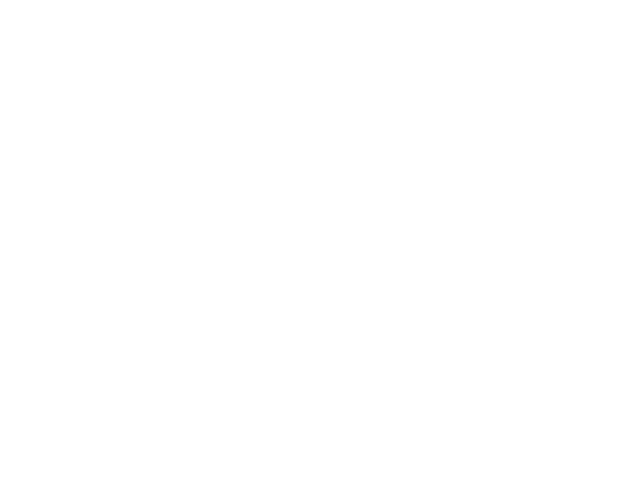

<IPython.core.display.Javascript object>


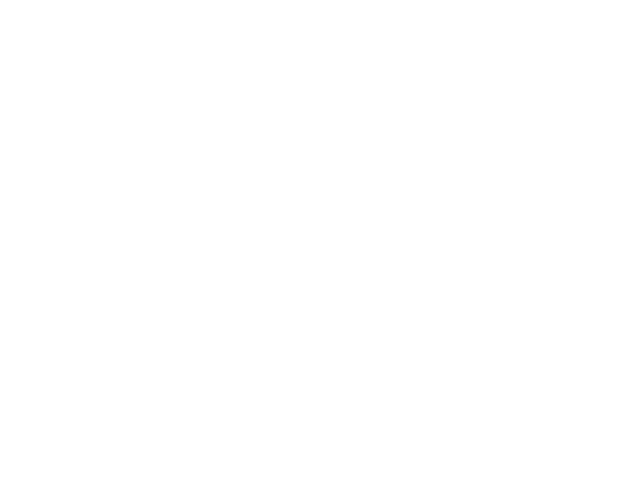

<IPython.core.display.Javascript object>


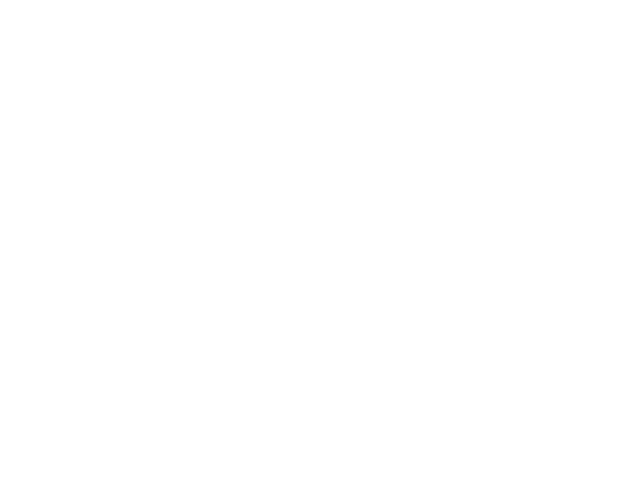

<IPython.core.display.Javascript object>


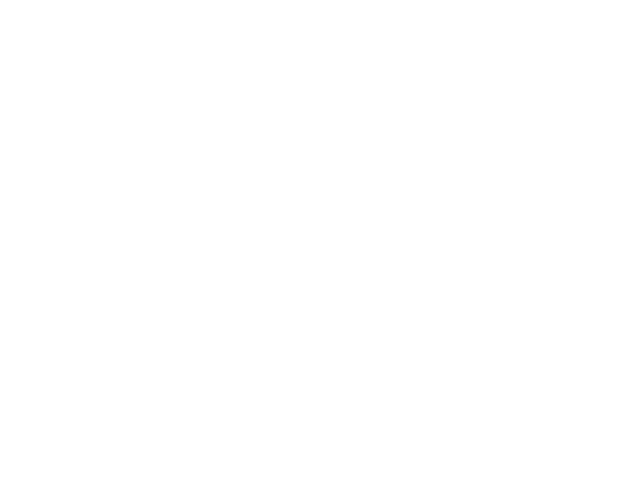

In [9]:
id_elec = 10
nombre_de_archivo = get_nombre_archivo(id_elec)
I,V = cargar_VI_por_ciclos(nombre_de_archivo)
#I,V = cargar_VI_por_ciclos(nombre_de_archivo, ciclos_a_saltear=100, ciclos_a_cargar=10)


# Promediar ciclos para I y para V
ciclo_I = promediar_ciclos(I)
ciclo_V = promediar_ciclos(V)

# Graficar los diagramas V-I 
graficar_diagrama_VI(I,V)
graficar_diagrama_VI(ciclo_I,ciclo_V)

# Graficamos I, V en el tiempo para observar las distintas partes del ciclo
graficar_I_V(I,V)


### 2.3 Explicar por qué se notan diferencias en las dos gráficas. Justificar

# RESPONDER

Observamos que la segunda gráfica es un promedio de todos los diagramas VI superpuestos en la primera gráfica. Por un lado, los efectos transitorios van a tener un comportamiento bastante distinto a la señal en régimen. Por otro lado, el régimen de la señal no es necesariamente siempre igual. Al promediar, se "limpia" el diagrama VI y podemos caracterizar mejor a la señal en su comportamiento completo, para identificar mejor al electrodoméstico. 

En el ejemplo de arriba (microondas), graficando todas las muestras de corriente en el tiempo, vemos claramente como la señal tiene 3 "etapas" distintas de funcionamiento. Entonces, tiene sentido que en el diagrama VI completo, se vean solapadas distintas formas, ya que cada etapa tendrá una forma distinta. Si cortamos la cantidad de ciclos cargados para que abarquen una sola etapa, el diagrama VI queda mucho más "limpio". 

## Parte 3. Comparar ciclos típicos de distintos tipos de electrodomésticos

### 3.1 Superponer las señales I, V y los diagramas V-I para electrodomésticos de distinto tipo
Para la superposición primero se alinean los ciclos promedio y luego se muestran juntos en cada gráfica.

Tipo: 1:Compact Fluorescent Lamp


<IPython.core.display.Javascript object>


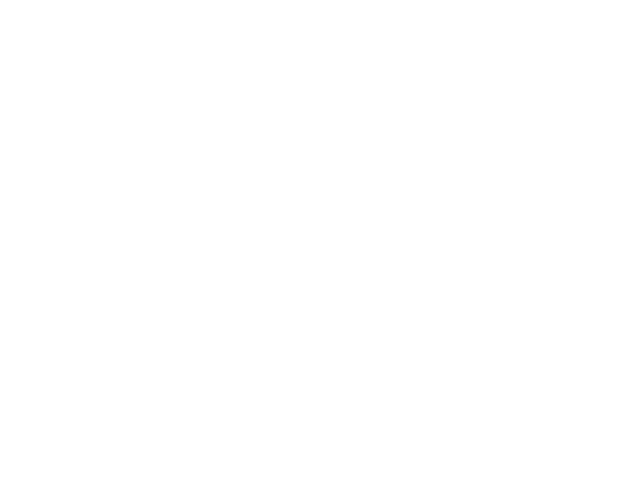

<IPython.core.display.Javascript object>


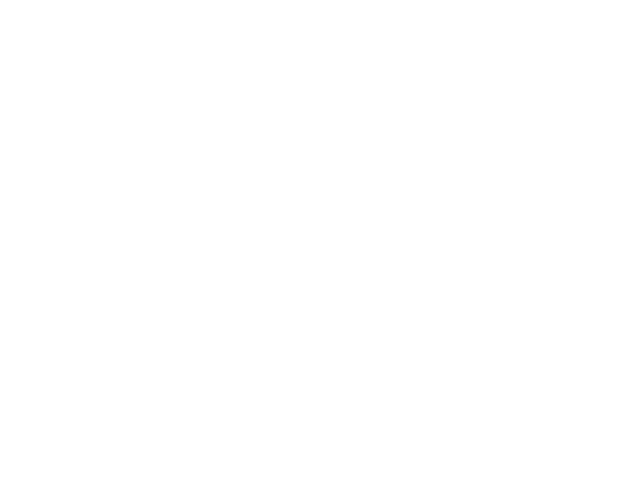

<IPython.core.display.Javascript object>


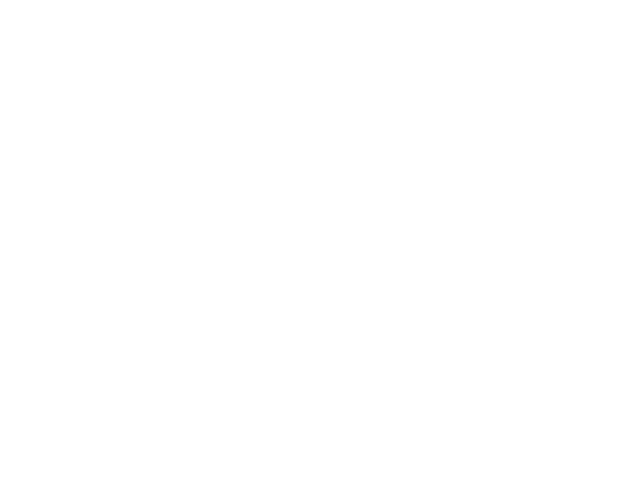

Tipo: 3:Fridge
Tipo: 4:Hairdryer


In [10]:
plt.close(1000)
plt.close(1001)
plt.close(2000)
colores = ['b','g','r']
i = 0
for id_elec in [1,6,8]:
    nombre_de_archivo = get_nombre_archivo(id_elec)

    I,V = cargar_VI_por_ciclos(nombre_de_archivo, ciclos_a_saltear=50)
    
    ciclo_I, ciclo_V = get_ciclo_I_V_promedio_alineado(I,V)
    
    
    print("Tipo: {}:{}".format(get_tipo(id_elec), get_nombre(id_elec)) )
    
    graficar_I_V(ciclo_I, ciclo_V, fignum=1000, color=colores[i])
    graficar_diagrama_VI(ciclo_I, ciclo_V, fignum=2000)
    
    i += 1

### 3.2 Superponer las señales I, V y los diagramas V-I para electrodomésticos del mismo tipo
Para la superposición primero se alinean los ciclos promedio y luego se muestran juntos en cada gráfica.

In [1]:
tipo = 8
ids = get_ids_por_tipo(tipo)


plt.close(1000)
plt.close(1001)
plt.close(2000)
for id_elec in ids[:3]:
    nombre_de_archivo = get_nombre_archivo(id_elec)

    I,V = cargar_VI_por_ciclos(nombre_de_archivo, ciclos_a_saltear=50)
    
    ciclo_I, ciclo_V = get_ciclo_I_V_promedio_alineado(I,V)
    
    
    print("Tipo: {}:{}".format(get_tipo(id_elec), get_nombre(id_elec)) )
    
    graficar_I_V(ciclo_I, ciclo_V, fignum=1000)
    graficar_diagrama_VI(ciclo_I, ciclo_V, fignum=2000)

NameError: name 'get_ids_por_tipo' is not defined

## Parte 4. Análisis en frecuencia

### 4.1 Completar las funciones para graficar la FFT 

In [12]:
def generar_vector_frecuencia(numero_muestras, frecuencia_muestreo=30000, centrar_frecuencia=True):
    '''
    Genera un vector de frecuencias del largo especificado
    If centrar_frecuencia==True (por defecto)
        salida es un array   [-Fm/2.....Fm/2-Fm/numero_muestras]
    else
        salida es un array   [0.....Fm-Fm/numero_muestras]
    '''
    step_frecuencia = frecuencia_muestreo/numero_muestras 
    vector_frecuencia = np.arange(0,frecuencia_muestreo,step_frecuencia)
    if centrar_frecuencia:
        vector_frecuencia = vector_frecuencia - frecuencia_muestreo/2
    
    return vector_frecuencia


def graficar_FI_FV(I,V, frecuencia_muestreo=30000, centrar_frecuencia=True, fignum=None):
    '''
    Genera un vector de frecuencia adecuado.
    Grafica el modulo de la transformada de I y de V en figuras separadas
    
    Si se le pasa un fignum, grafica FI sobre la figura (fignum) y FV sobre la 
    figura (fignum+1). De lo contrario crea dos figuras nuevas.
    '''
    numero_muestras = len(I)
    vector_frecuencia = generar_vector_frecuencia(numero_muestras, frecuencia_muestreo, centrar_frecuencia)
    
    # COMPLETADO
    
    #Grafica corrientes
    plt.figure(fignum)
    if centrar_frecuencia:
        plt.plot(vector_frecuencia, np.abs(fftshift(fft(I))), 'r')
    else:
        plt.plot(vector_frecuencia, np.abs(fft(I)), 'r')
        
    plt.title("$abs(fft(I)) = f(f)$")
    plt.xlabel("Frecuencia $f$")
    plt.ylabel("$fft(I)$")
    
    #Grafica voltajes
    if(fignum == None):
        plt.figure()
    else:
        plt.figure(fignum + 1)
        
    if centrar_frecuencia:
        plt.plot(vector_frecuencia, np.abs(fftshift(fft(V))), 'r')
    else:
        plt.plot(vector_frecuencia, np.abs(fft(V)), 'r')
        
    plt.title("$abs(fft(V)) = f(f)$")
    plt.xlabel("Frecuencia $f$")
    plt.ylabel("$fft(V)$")
     

def graficar_espectrograma_I_V(I,V, frecuencia_muestreo=30000, largo_ventana=256, fignum=None):
    '''
    Grafica el espectrograma de I y de V en figuras separadas
    
    Si se le pasa un fignum, grafica el espectrograma de I sobre la figura (fignum)
    y el de V sobre la figura (fignum+1). De lo contrario crea dos figuras nuevas.
    '''
    f,t,SI = spectrogram(I,fs=frecuencia_muestreo, nperseg=largo_ventana)
    f,t,SV = spectrogram(V,fs=frecuencia_muestreo, nperseg=largo_ventana)
    
    
    if not fignum is None:
        plt.figure(fignum)
    else:
        plt.figure()
    
    plt.pcolormesh(t, f, SI)
    plt.title('Espectrograma de I')
    plt.ylabel('Frecuencia [Hz]')
    plt.xlabel('Tiempo [s]')
    
    if not fignum is None:
        plt.figure(fignum)
    else:
        plt.figure()
    
    plt.pcolormesh(t, f, SV)
    plt.title('Espectrograma de V')
    plt.ylabel('Frecuencia [Hz]')
    plt.xlabel('Tiempo [s]')
    
    
# Testeo de porque nos da error el espectrograma    
#I,V = cargar_VI_por_ciclos("C:/Users/carlos/Downloads/PLAID/CSV/10.csv", ciclos_a_saltear=50)
#print(I[:,0].flatten())
#print(I[:,0].shape)
#f,t,SI = spectrogram(I,fs=30000, nperseg=256)
#print(f.shape)
#print(t.shape)
#print(SI.shape)

### 4.2 Graficar el módulo de la transformada de Fourier
* Graficar para distintos tipos de electrodomésticos
* Registrar los componentes de frecuencia presentes en cada caso. Analizar las diferencias.
* Comparar los componentes de frecuencia presentes en las señales V e I para un electrodoméstico. Analizar las diferencias
* ¿Es adecuada la frecuencia de muestreo a la cual se adquirieron las señales?  


500
Tipo: 1:Compact Fluorescent Lamp


<IPython.core.display.Javascript object>


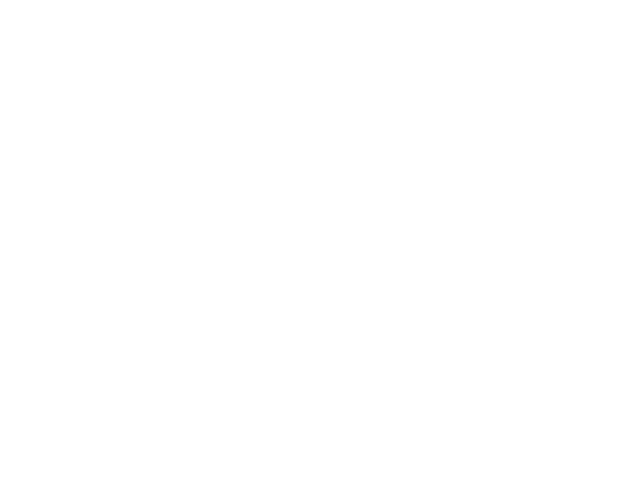

<IPython.core.display.Javascript object>


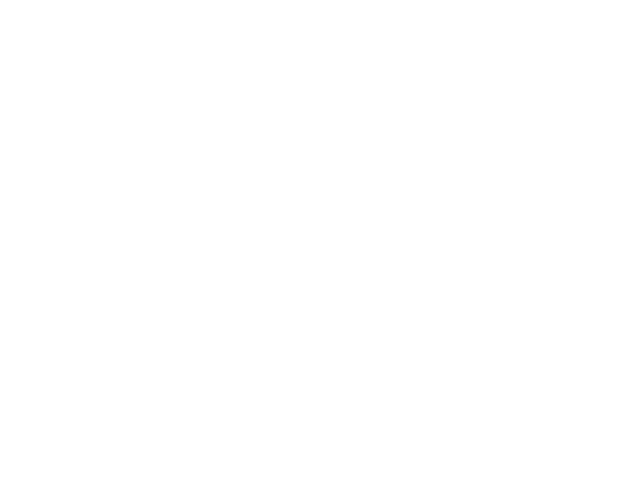

<IPython.core.display.Javascript object>


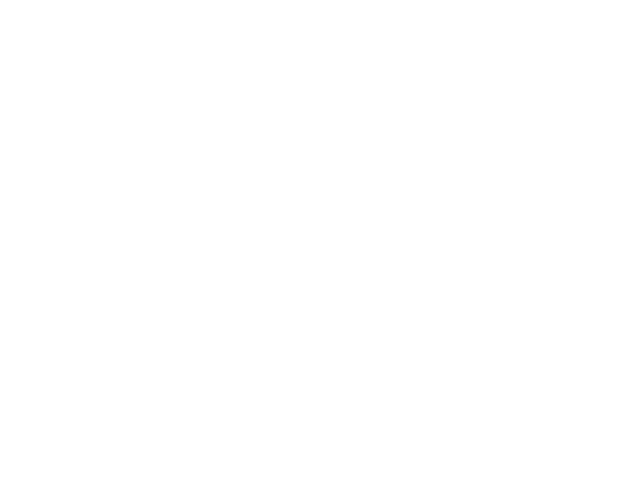

<IPython.core.display.Javascript object>


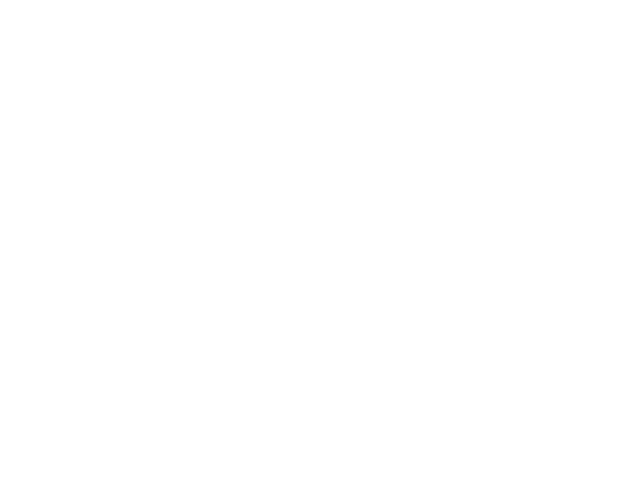

In [13]:
%matplotlib notebook

#EXPERIMENTAR con distintos tipos de electrodomésticos. Comparar, analizar diferencias

id_elec = 1
nombre_de_archivo = get_nombre_archivo(id_elec)

ciclos_a_saltear = 0
I,V = cargar_VI_por_ciclos(nombre_de_archivo, ciclos_a_saltear=ciclos_a_saltear)
I,V = promediar_ciclos(I), promediar_ciclos(V)
print(len(I))

print("Tipo: {}:{}".format(get_tipo(id_elec), get_nombre(id_elec)) )

graficar_I_V(I,V)
graficar_FI_FV(I,V, centrar_frecuencia=False)



# DISCUTIR (sobre experimentos y preguntas de 4.2)

Observamos que para todos los electrodomésticos, la fft del voltaje es casi igual, ya que corresponde a la fft de la tensión de línea que es la misma para todos los dispositivos conectados a la red eléctrica. Esta fft tiene sus componentes de frecuencias acumulados densamente en "deltas" correspondientes en las frecuencias +-F_linea. Esto es acorde a que el voltaje es una sinusoidal representable aproximadamente solo por su frecuencia fundamental (primer armónico). 

En cambio para la corriente, vemos que en algunos casos es mucho más irregular y por más que sea periódica no tiene forma de una sinusoide. Por lo tanto, su fft contiene muchos más armónicos, todos impares (potencia más distribuida en frecuencia). 

La frecuencia de muestreo elegida es adecuada ya que es mucho más del doble de la frecuencia de línea, por tanto se cumple el Teorema de Muestreo y no vemos aliasing (podemos reconstruir bien la señal a partir de su fft). 

### 4.3 Graficar el espectrograma para una señal

Tipo: 8:Microwave


<IPython.core.display.Javascript object>


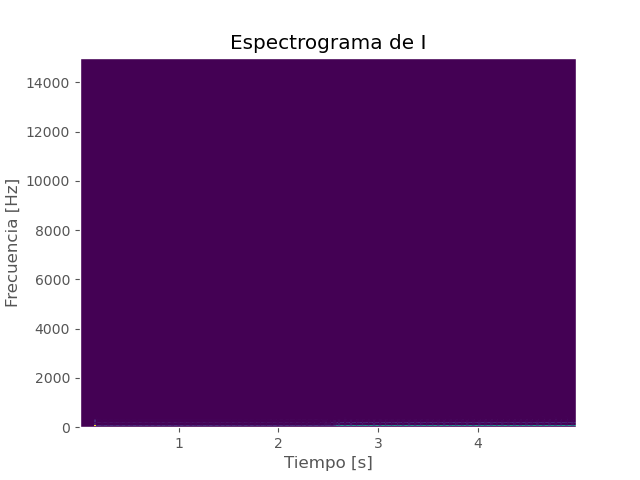

<ipython-input-12-f05f25b8eb8e>:73: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, SI)


<IPython.core.display.Javascript object>


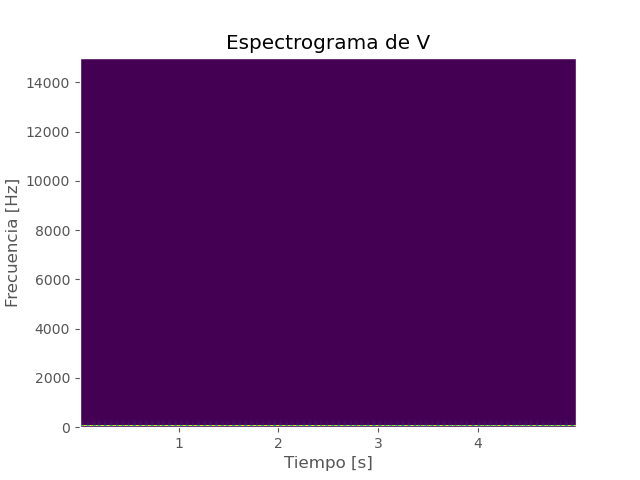

<ipython-input-12-f05f25b8eb8e>:83: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, SV)


In [14]:
%matplotlib notebook
id_elec = 10
nombre_de_archivo = get_nombre_archivo(id_elec)

I,V = cargar_VI_por_ciclos(nombre_de_archivo)

print("Tipo: {}:{}".format(get_tipo(id_elec), get_nombre(id_elec)) )

# EXPERIMENTAR distintos largos de ventana
largo_ventana = 500
graficar_espectrograma_I_V(I, V, largo_ventana=largo_ventana)


### 4.4 Espectrograma
* Explicar cómo se calcula el espectrograma. 
* Comentar sobre el compromiso de resolución en tiempo y en frecuencia.
* Explorar distintos largos de ventana. Comentar cómo afecta el largo de ventana al espectrograma.

# RESPONDER, DISCUTIR

El espectrograma calcula el espectro de la señal para cada intervalo de tiempo dado y genera una representación gráfica de tres dimensiones, mostrando como varía el espectro en el tiempo. Como se quiere hacer una representación en dos dimensiones, la "altura" o energía de los espectros se representa con colores, siendo violeta oscuro correspondiente a potencia nula. 

El largo de la venta (nperseg) corresponde a cuantas muestras de tiempo se toman para cada ventana. Luego, se hace la fft de la señal enventanada. Al aumentar nperseg, se agrandan los intervalos de tiempo en los cuales se calcula cada espectro y por tanto se gana resolución en frecuencia. Por consiguiente, se pierde resolución en el tiempo. 

En nuestro caso, las señales son de 60Hz y se muestrea a 30kHz, por tanto, se tienen 500 muestras por ciclo. Si el largo de la ventana es menor a el largo de un periodo (nperseg < 500), el espectro calculado no va a ser representativo de las señales en cuestión. Sin embargo, si el largo de la ventana es demasiado, se deja de poder apreciar en que momento se da cada espectro en el tiempo (aparecen solapadas todas las frecuencias en un mismo intervalo de tiempo). 

## 5 Distorsión armónica
Una medida que se usa para medir el nivel de armónicos en una señal es el "Total Harmonic Distortion (THD)" o también llamado "Distortion Factor". Esta medida se calcula como la relación entre el valor rms de los armónicos (por sobre la fundamental) y el valor rms de la fundamental.  

Para las señales I y V se puede calcular entonces el factor de distorsión como:

$THD_I = \frac{\sum_{k=2}^{\infty} I_{krms} }{I_{1rms}} = \frac{\sum_{k=2}^{\infty} I_{k} }{I_{1}} $

$THD_V = \frac{\sum_{k=2}^{\infty} V_{krms} }{V_{1rms}} = \frac{\sum_{k=2}^{\infty} V_{k} }{V_{1}}$




### 5.1 Completar la función que calcula la THD de una señal

In [15]:
# Calcular el factor de distorsión para una señal S
def calcular_THD(S, frecuencia_muestreo=30000, frecuencia_linea=60):
    
    numero_muestras = len(S)
    FS = fft(S)
        
    #np.sqrt(2) para que sea rms,  el dos viene porque tenemos frecuencias positivas y negativas 
    #luego de esto solo vamos a usar las frecuencias positivas
    FS_rms = np.abs(FS)/numero_muestras  * 2/np.sqrt(2)  
    
    step_frecuencia = frecuencia_muestreo/numero_muestras 
    indice_frecuencia_fundamental = int(frecuencia_linea / step_frecuencia)
    
    indices_armonicos = np.arange(2*indice_frecuencia_fundamental,
                                  numero_muestras//2,
                                  indice_frecuencia_fundamental) 
    
    distorsion = np.sqrt(np.sum(FS_rms[indices_armonicos]**2)) / FS_rms[indice_frecuencia_fundamental]
    return distorsion

### 5.2 Mostrar  la distorsión en V e I para los distintos tipos de electrodomésticos

In [16]:
# calcular la distorsión en V e I para distintos tipos de electrodomésticos

print('{:<30}{:<10}{:<10}'.format('Tipo electrodoméstico', 'THD_V(%)', 'THD_I(%)'))
print('---------------------------------------------------------')
for tipo in range(len(nombres_electrodomesticos)):
    ids = get_ids_por_tipo(tipo)
    id_elec = np.random.choice(ids)
    
    nombre_de_archivo = get_nombre_archivo(id_elec)
    ciclos_a_saltear = 50
    ciclos_a_cargar = 1e100
    I,V = cargar_VI_por_ciclos(nombre_de_archivo, ciclos_a_saltear=ciclos_a_saltear, ciclos_a_cargar=ciclos_a_cargar)
    
    THD_V = calcular_THD(V,frecuencia_muestreo, frecuencia_linea)
    THD_I = calcular_THD(I,frecuencia_muestreo, frecuencia_linea)
    
    print('{:<30}{:.3f}{:10.3f}'.format(nombres_electrodomesticos[tipo], THD_V*100, THD_I*100))



Tipo electrodoméstico         THD_V(%)  THD_I(%)  
---------------------------------------------------------
Air Conditioner               1.584     3.506
Compact Fluorescent Lamp      2.156    89.170
Fan                           2.297     3.933
Fridge                        2.513     6.202
Hairdryer                     2.368     2.385
Heater                        1.726     1.586
Incandescent Light Bulb       1.674     2.104
Laptop                        2.585   137.679
Microwave                     2.540    38.918
Vacuum                        3.334    21.673
Washing Machine               2.843     2.400


## Parte 6. Potencia


### 6.1 Completar las funciones que permiten calcular la potencia media, activa, aparente, etc.. 

La potencia media se calcula como la media de la potencia instantánea a lo largo de un número entero de ciclos

$P_{media} = \frac{1}{kT} \int_{\tau}^{\tau + kT} p(t) dt = \frac{1}{kT} \int_{\tau}^{\tau + kT} v(t)i(t) dt$

La potencia media coincide con la potencia activa $P$.   

Para el caso de corriente y voltaje no sinusoidales, el cálculo de otros valores de la potencia eléctrica (que afectan la medición del consumo) ha llevado una discusión de aproximadamente un siglo. Algunas contribuciones a esta discusión son las de:   
1927 –Budeanu  
1932 –Fryze  
1962 –Depenbrock  
1984 –Czarnecki  
1995 –Emanuel (que da lugar al estándar IEEE-1459)  

Para este trabajo usaremos las definiciones y criterios de cálculo definidos en el estándar IEEE-1495-2010 (revisión del año 2010).

[1] IEEE Standard Definitions for the Measurement of Electric Power Quantities Under Sinusoidal, Nonsinusoidal, Balanced, or Unbalanced Conditions," in IEEE Std 1459-2010 (Revision of IEEE Std 1459-2000) , vol., no., pp.1-50, 19 March 2010
doi: 10.1109/IEEESTD.2010.5439063
keywords: {harmonic distortion;power system measurement;reactive power;IEEE standard definitions;electric power quantities measurement;sinusoidal conditions;nonsinusoidal conditions;balanced conditions;unbalanced conditions;active power;apparent power;nonactive power;power factor;reactive power;total harmonic distortion;IEEE standards;Measurement;Power electronics;1459-2010;active power;apparent power;nonactive power;power factor;reactive power;total harmonic distortion},
URL: http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=5439063&isnumber=5439062


[2] J. L Willems, "The IEEE standard 1459: What and why?," 2010 IEEE International Workshop on Applied Measurements for Power Systems, Aachen, 2010, pp. 41-46.
doi: 10.1109/AMPS.2010.5609324
keywords: {IEEE standards;measurement standards;power measurement;IEEE standard 1459;electric power quantities;reactive power;apparent power;power factor;single-phase sinusoidal systems;DIN Norm 40110;Reactive power;IEEE standards;Conductors;Voltage measurement;Pollution measurement;Power system harmonics;active power;reactive power;apparent power;power factor;IEEE Standard},
URL: http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=5609324&isnumber=5609318


[3] Yumak, Kahraman, and Omer Usta. "A controversial issue: Power components in nonsinusoidal single-phase systems." In 2011 7th International Conference on Electrical and Electronics Engineering (ELECO), pp. I-157. IEEE, 2011.

(Opcional. Muestra los diferentes criterios a lo largo del tiempo)  
[4] Svensson, Stefan. Power measurement techniques for nonsinusoidal conditions. The significance of harmonics for the measurement of power and other AC quantities. Chalmers University of Technology, 1999.




In [41]:
def calcular_potencia_media(I,V, frecuencia_muestreo=30000, frecuencia_linea=60):
    '''
    Calcula la potencia media
    '''
    # COMPLETADO
    potencia_media = np.sum(I*V)/len(I)
    return potencia_media
    
    
def calcular_potencia_IEEE_1459_2010(I,V, frecuencia_muestreo=30000, frecuencia_linea=60):
    '''
    Calcula la potencia para señales I,V que pueden ser no-sinusoidales.
    Se supone que las señales I y V tienen un número entero de períodos.
    
    Los cálculos se realizan en frecuencia. Para esta implementación se consideran únicamente la frecuencia
    fundamental y sus armónicos. No se tienen en cuenta otras componentes de frecuencia intermedias.
    
    La función devuelve: S, S_11, S_H, S_N, P, P_11, P_H, Q_11, D_I, D_V, D_H, N, THD_V, THD_I
    S        Apparent power
    S_11     Fundamental apparent power
    S_H      Harmonic apparent power
    S_N      Non-fundamental apparent power
    P        Active power
    P_11     Fundamental active power
    P_H      Harmonics active power
    Q_11     Fundamental reactive power
    D_I      Current distortion power
    D_V      Voltage distortion power
    D_H      Harmonic distortion power
    N        Non-active apparent power
    THD_V    Total harmonic distortion for voltage
    THD_I    Total harmonic distortion for current
    '''
    
    # COMPLETADO
    
    numero_muestras = len(I)
    FI = fft(I)
    FV = fft(V)
    FI_rms = np.abs(FI)/numero_muestras  * 2/np.sqrt(2) 
    FV_rms = np.abs(FV)/numero_muestras  * 2/np.sqrt(2)
    
    step_frecuencia = frecuencia_muestreo/numero_muestras 
    indice_frecuencia_fundamental = int(frecuencia_linea / step_frecuencia)
    indices_armonicos = np.arange(2*indice_frecuencia_fundamental,
                                  numero_muestras//2,
                                  indice_frecuencia_fundamental) 
   
    theta1 = np.angle(FV[indice_frecuencia_fundamental])-np.angle(FI[indice_frecuencia_fundamental])

    #S_11:
    S_11 = FI_rms[indice_frecuencia_fundamental]*FV_rms[indice_frecuencia_fundamental]
    
    #THD_V:
    THD_V = calcular_THD(V, frecuencia_muestreo=frecuencia_muestreo, frecuencia_linea=frecuencia_linea)
    
    #THD_I:
    THD_I = calcular_THD(I, frecuencia_muestreo=frecuencia_muestreo, frecuencia_linea=frecuencia_linea)
    
    #S_H:
    S_H = S_11*THD_V*THD_I
    
    #P:
    P = calcular_potencia_media(I,V,frecuencia_muestreo=frecuencia_muestreo, frecuencia_linea=frecuencia_linea)
    
    #P_11:
    P_11 = S_11*np.cos(theta1)
    
    #P_H:
    P_H = P - P_11
    
    #Q_11:
    Q_11 = S_11*np.sin(theta1)
    
    #D_I:
    D_I = S_11*THD_I
    
    #D_V:
    D_V = S_11*THD_V
    
    #D_H:
    D_H = np.sqrt(abs(S_H**2-P_H**2))
    
    #S_N:
    S_N = np.sqrt(D_I**2+D_V**2+S_H**2)
    
    #S:
    S = np.sqrt(S_11**2+S_N**2)
    
    #N:
    N = np.sqrt(abs(S**2-P**2))
    
    return S, S_11, S_H, S_N, P, P_11, P_H, Q_11, D_I, D_V, D_H, N, THD_V, THD_I




### 6.2 Verificar las funciones de cálculo de potencia con ejemplos sintéticos

Se usarán para la verificación los ejemplos sintéticos del artículo:  

Yumak, Kahraman, and Omer Usta. "A controversial issue: Power components in nonsinusoidal single-phase systems." In 2011 7th International Conference on Electrical and Electronics Engineering (ELECO), pp. I-157. IEEE, 2011.   

La salida de la función 'calcular_potencia_IEEE_1459_2010' debe coincidir con los valores del artículo para todos los casos. 

In [28]:
numero_ciclos = 10
muestras_por_ciclo = frecuencia_muestreo // frecuencia_linea 
numero_muestras = numero_ciclos * muestras_por_ciclo
T = generar_vector_tiempo(numero_muestras,frecuencia_muestreo)

In [29]:
#Caso 1 - Voltaje y corriente sinusoidales

V = 100*np.sqrt(2) * np.sin(2*np.pi*frecuencia_linea*1*T + 0)
I = 60*np.sqrt(2)  * np.sin(2*np.pi*frecuencia_linea*1*T + np.deg2rad(-30 ))

P_media = calcular_potencia_media(I,V,frecuencia_muestreo=30000, frecuencia_linea=60)

S, S_11, S_H, S_N, P, P_11, P_H, Q_11, D_I, D_V, D_H, N, THD_V, THD_I = \
calcular_potencia_IEEE_1459_2010(I,V, frecuencia_muestreo=30000, frecuencia_linea=60)

print('S={:.2f}, S_11={:.2f}, S_H={:.2f}, S_N={:.2f}, P={:.2f}, P_11={:.2f}, P_H={:.2f}, Q_11={:.2f}, D_I={:.2f}, D_V={:.2f}, D_H={:.2f}, N={:.2f}, THD_V={:.2f}, THD_I={:.2f}'.format(S, S_11, S_H, S_N, P, P_11, P_H, Q_11, D_I, D_V, D_H, N, THD_V, THD_I))
print('Potencia media={:.2f}'.format(P_media) ) 
print('Factor de potencia: total(P/S)={:.3f}, fundamental(P_11/S_11)={:.3f}'.format(P/S, P_11/S_11))

S=6000.00, S_11=6000.00, S_H=0.00, S_N=0.00, P=5196.15, P_11=5196.15, P_H=0.00, Q_11=3000.00, D_I=0.00, D_V=0.00, D_H=0.00, N=3000.00, THD_V=0.00, THD_I=0.00
Potencia media=5196.15
Factor de potencia: total(P/S)=0.866, fundamental(P_11/S_11)=0.866


In [30]:
#Caso 2 - Voltaje sinusoidal, corriente no sinusoidal 

T = generar_vector_tiempo(numero_muestras,frecuencia_muestreo)
V = 100*np.sqrt(2) * np.sin(2*np.pi*frecuencia_linea*1*T + 0)
I = 60*np.sqrt(2)  * np.sin(2*np.pi*frecuencia_linea*1*T + np.deg2rad(-30 )) + \
    15*np.sqrt(2)  * np.sin(2*np.pi*frecuencia_linea*3*T + np.deg2rad(-165)) + \
    12*np.sqrt(2)  * np.sin(2*np.pi*frecuencia_linea*5*T + np.deg2rad(+285)) + \
    10*np.sqrt(2)  * np.sin(2*np.pi*frecuencia_linea*7*T + np.deg2rad(+310)) 
    

P_media = calcular_potencia_media(I,V,frecuencia_muestreo=30000, frecuencia_linea=60)

S, S_11, S_H, S_N, P, P_11, P_H, Q_11, D_I, D_V, D_H, N, THD_V, THD_I = \
calcular_potencia_IEEE_1459_2010(I,V, frecuencia_muestreo=30000, frecuencia_linea=60)

print('S={:.2f}, S_11={:.2f}, S_H={:.2f}, S_N={:.2f}, P={:.2f}, P_11={:.2f}, P_H={:.2f}, Q_11={:.2f}, D_I={:.2f}, D_V={:.2f}, D_H={:.2f}, N={:.2f}, THD_V={:.2f}, THD_I={:.2f}'.format(S, S_11, S_H, S_N, P, P_11, P_H, Q_11, D_I, D_V, D_H, N, THD_V, THD_I))
print('Potencia media={:.2f}'.format(P_media) ) 
print('Factor de potencia: total(P/S)={:.3f}, fundamental(P_11/S_11)={:.3f}'.format(P/S, P_11/S_11))

#graficar_I_V(I,V)
#graficar_FI_FV(I,V)

S=6378.87, S_11=6000.00, S_H=0.00, S_N=2165.64, P=5196.15, P_11=5196.15, P_H=0.00, Q_11=3000.00, D_I=2165.64, D_V=0.00, D_H=0.00, N=3700.00, THD_V=0.00, THD_I=0.36
Potencia media=5196.15
Factor de potencia: total(P/S)=0.815, fundamental(P_11/S_11)=0.866


In [31]:
#Caso 3 - Voltaje no sinusoidal, corriente sinusoidal 

T = generar_vector_tiempo(numero_muestras,frecuencia_muestreo)
V = 100*np.sqrt(2)  * np.sin(2*np.pi*frecuencia_linea*1*T + np.deg2rad(0   )) + \
    20 *np.sqrt(2)  * np.sin(2*np.pi*frecuencia_linea*3*T + np.deg2rad(-70 )) + \
    25 *np.sqrt(2)  * np.sin(2*np.pi*frecuencia_linea*5*T + np.deg2rad(+140)) + \
    10 *np.sqrt(2)  * np.sin(2*np.pi*frecuencia_linea*7*T + np.deg2rad(+210))     
I = 60*np.sqrt(2)   * np.sin(2*np.pi*frecuencia_linea*1*T + np.deg2rad(-30 ))

    
P_media = calcular_potencia_media(I,V,frecuencia_muestreo=30000, frecuencia_linea=60)

S, S_11, S_H, S_N, P, P_11, P_H, Q_11, D_I, D_V, D_H, N, THD_V, THD_I = \
calcular_potencia_IEEE_1459_2010(I,V, frecuencia_muestreo=30000, frecuencia_linea=60)

print('S={:.2f}, S_11={:.2f}, S_H={:.2f}, S_N={:.2f}, P={:.2f}, P_11={:.2f}, P_H={:.2f}, Q_11={:.2f}, D_I={:.2f}, D_V={:.2f}, D_H={:.2f}, N={:.2f}, THD_V={:.2f}, THD_I={:.2f}'.format(S, S_11, S_H, S_N, P, P_11, P_H, Q_11, D_I, D_V, D_H, N, THD_V, THD_I))
print('Potencia media={:.2f}'.format(P_media) ) 
print('Factor de potencia: total(P/S)={:.3f}, fundamental(P_11/S_11)={:.3f}'.format(P/S, P_11/S_11))

S=6328.51, S_11=6000.00, S_H=0.00, S_N=2012.46, P=5196.15, P_11=5196.15, P_H=0.00, Q_11=3000.00, D_I=0.00, D_V=2012.46, D_H=0.00, N=3612.48, THD_V=0.34, THD_I=0.00
Potencia media=5196.15
Factor de potencia: total(P/S)=0.821, fundamental(P_11/S_11)=0.866


In [32]:
#Caso 4 - Voltaje y corriente no sinusoidales

T = generar_vector_tiempo(numero_muestras,frecuencia_muestreo)
V = 100*np.sqrt(2)  * np.sin(2*np.pi*frecuencia_linea*1*T + np.deg2rad(0   )) + \
    20 *np.sqrt(2)  * np.sin(2*np.pi*frecuencia_linea*3*T + np.deg2rad(-70 )) + \
    25 *np.sqrt(2)  * np.sin(2*np.pi*frecuencia_linea*5*T + np.deg2rad(+140)) + \
    10 *np.sqrt(2)  * np.sin(2*np.pi*frecuencia_linea*7*T + np.deg2rad(+210))     
I = 60*np.sqrt(2)  * np.sin(2*np.pi*frecuencia_linea*1*T + np.deg2rad(-30 )) + \
    15*np.sqrt(2)  * np.sin(2*np.pi*frecuencia_linea*3*T + np.deg2rad(-165)) + \
    12*np.sqrt(2)  * np.sin(2*np.pi*frecuencia_linea*5*T + np.deg2rad(+285)) + \
    10*np.sqrt(2)  * np.sin(2*np.pi*frecuencia_linea*7*T + np.deg2rad(+310)) 

P_media = calcular_potencia_media(I,V,frecuencia_muestreo=30000, frecuencia_linea=60)

S, S_11, S_H, S_N, P, P_11, P_H, Q_11, D_I, D_V, D_H, N, THD_V, THD_I = \
calcular_potencia_IEEE_1459_2010(I,V, frecuencia_muestreo=30000, frecuencia_linea=60)

print('S={:.2f}, S_11={:.2f}, S_H={:.2f}, S_N={:.2f}, P={:.2f}, P_11={:.2f}, P_H={:.2f}, Q_11={:.2f}, D_I={:.2f}, D_V={:.2f}, D_H={:.2f}, N={:.2f}, THD_V={:.2f}, THD_I={:.2f}'.format(S, S_11, S_H, S_N, P, P_11, P_H, Q_11, D_I, D_V, D_H, N, THD_V, THD_I))
print('Potencia media={:.2f}'.format(P_media) ) 
print('Factor de potencia: total(P/S)={:.3f}, fundamental(P_11/S_11)={:.3f}'.format(P/S, P_11/S_11))

S=6728.12, S_11=6000.00, S_H=726.38, S_N=3044.28, P=4906.90, P_11=5196.15, P_H=-289.26, Q_11=3000.00, D_I=2165.64, D_V=2012.46, D_H=666.30, N=4603.26, THD_V=0.34, THD_I=0.36
Potencia media=4906.90
Factor de potencia: total(P/S)=0.729, fundamental(P_11/S_11)=0.866


### 6.3 Verificar las funciones de 6.1 sobre señales de electrodomésticos

Electrodomésticos tipo 10:Washing Machine
[80, 185, 186, 187, 188, 189, 488, 489, 490, 491, 492, 531, 532, 533, 534, 535, 620, 621, 622, 623, 624, 625, 845, 906, 1005, 1074]


<IPython.core.display.Javascript object>


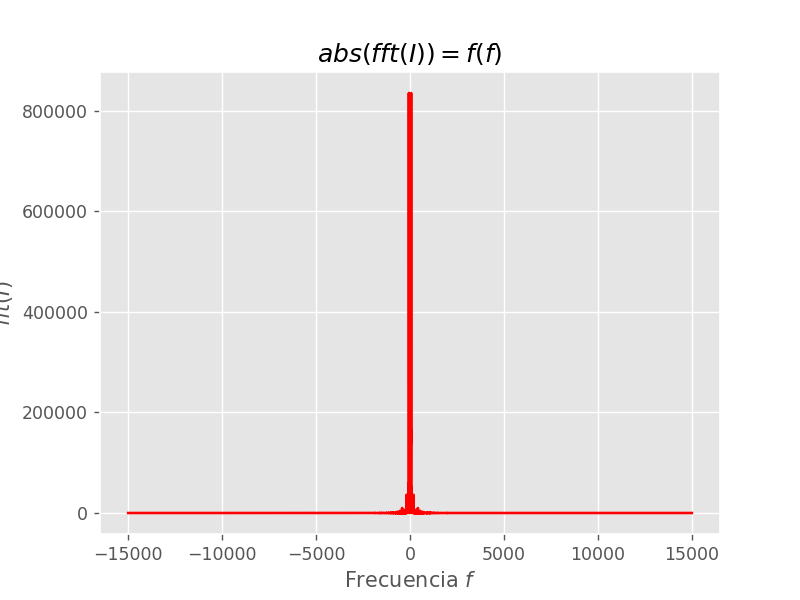

<IPython.core.display.Javascript object>


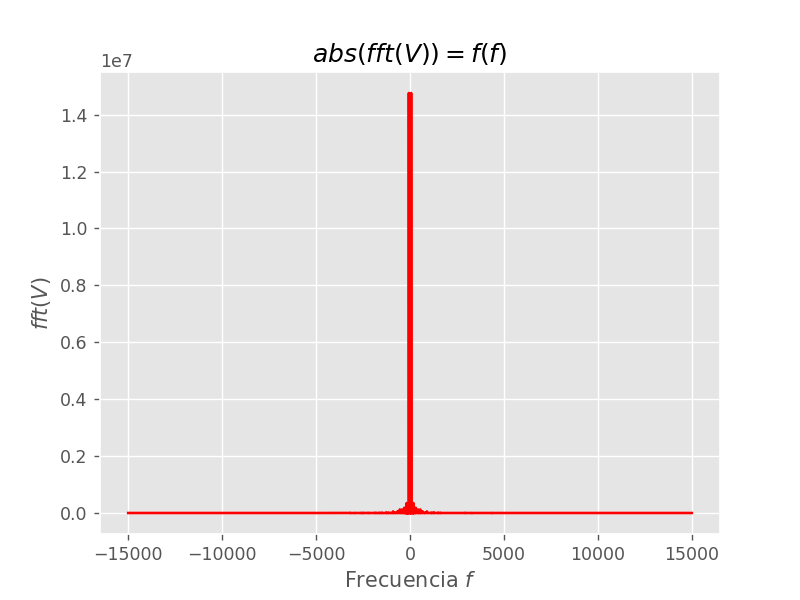

-------------------------------------------------------------
S=806.88, S_11=805.65, S_H=1.11, S_N=44.38, P=552.41, P_11=570.89, P_H=-18.48, Q_11=568.47, D_I=37.27, D_V=24.06, D_H=18.45, N=588.12, THD_V=0.03, THD_I=0.36
Potencia media=552.41
Factor de potencia: total(P/S)=0.685, fundamental(P_11/S_11)=0.709


In [33]:
# EXPERIMENTAR
# con señales de electrodomésticos

%matplotlib notebook


tipo = np.random.choice(len(nombres_electrodomesticos))
ids = get_ids_por_tipo(tipo)
print('Electrodomésticos tipo {}:{}'.format(tipo, nombres_electrodomesticos[tipo]))
print(ids)
id_elec = np.random.choice(ids)
nombre_de_archivo = get_nombre_archivo(id_elec)


ciclos_a_saltear = 50
ciclos_a_cargar = 1e100
I,V = cargar_VI_por_ciclos(nombre_de_archivo, ciclos_a_saltear=ciclos_a_saltear, ciclos_a_cargar=ciclos_a_cargar)


P_media = calcular_potencia_media(I,V)

S, S_11, S_H, S_N, P, P_11, P_H, Q_11, D_I, D_V, D_H, N, THD_V, THD_IR = \
calcular_potencia_IEEE_1459_2010(I,V, frecuencia_muestreo=30000, frecuencia_linea=60)

graficar_FI_FV(I,V)


print('-------------------------------------------------------------')
print('S={:.2f}, S_11={:.2f}, S_H={:.2f}, S_N={:.2f}, P={:.2f}, P_11={:.2f}, P_H={:.2f}, Q_11={:.2f}, D_I={:.2f}, D_V={:.2f}, D_H={:.2f}, N={:.2f}, THD_V={:.2f}, THD_I={:.2f}'.format(S, S_11, S_H, S_N, P, P_11, P_H, Q_11, D_I, D_V, D_H, N, THD_V, THD_I))
print('Potencia media={:.2f}'.format(P_media) ) 
print('Factor de potencia: total(P/S)={:.3f}, fundamental(P_11/S_11)={:.3f}'.format(P/S, P_11/S_11))





### 6.4 Verificar gráficamente que el desfasaje entre las señales V e I se relaciona correctamente con el factor de potencia calculado 

-------------------------------------------------------------
Electrodoméstico: id=56, tipo=9:Vacuum
S=697.48, S_11=680.77, S_H=2.80, S_N=151.74, P=679.68, P_11=680.24, P_H=-0.56, Q_11=27.01, D_I=151.19, D_V=12.59, D_H=2.74, N=156.56, THD_V=0.02, THD_I=0.36
Potencia media=679.68
Factor de potencia: total(P/S)=0.974, fundamental(P_11/S_11)=0.999


<IPython.core.display.Javascript object>


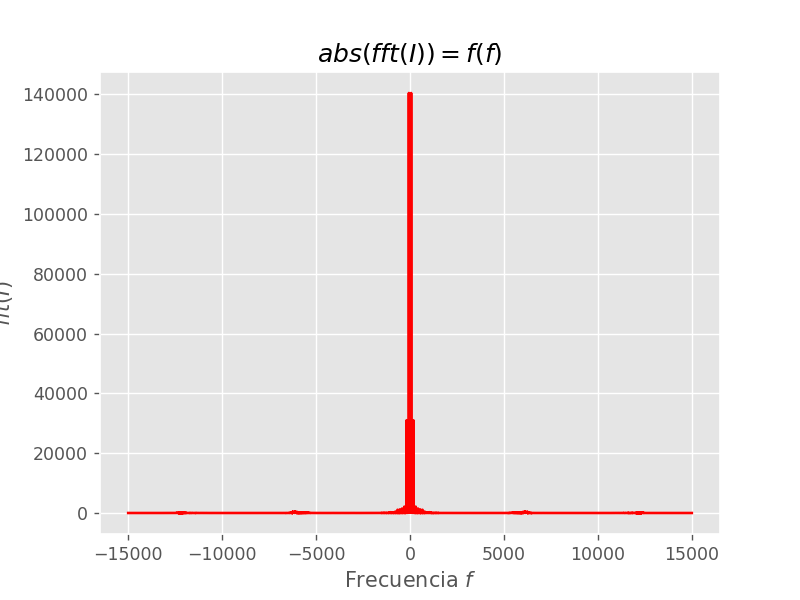

<IPython.core.display.Javascript object>


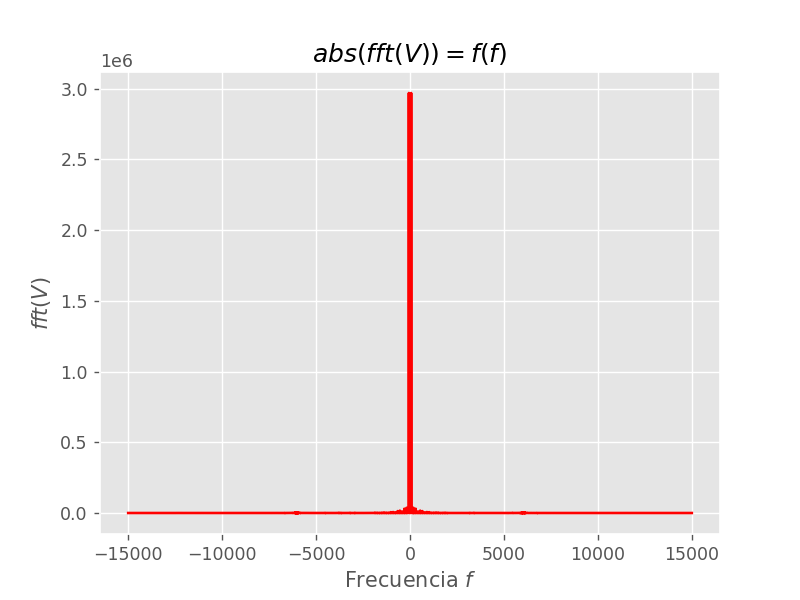

<IPython.core.display.Javascript object>


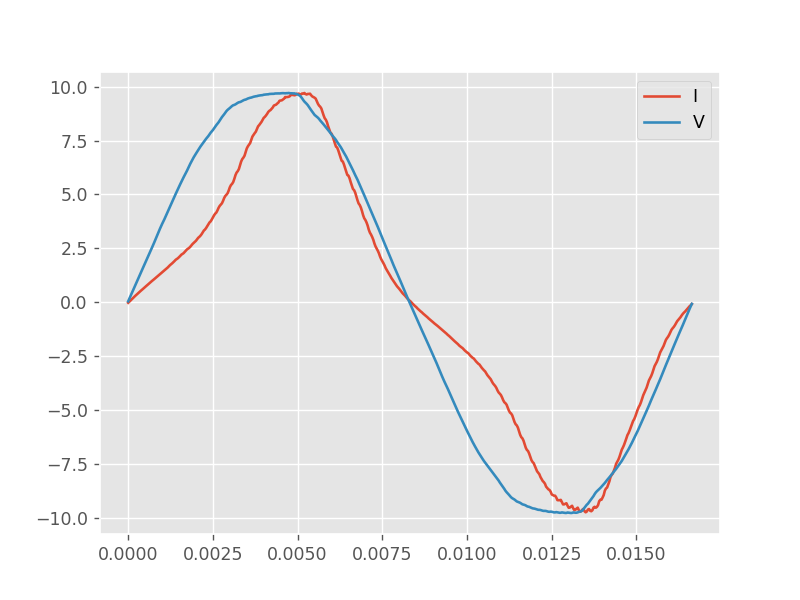

<IPython.core.display.Javascript object>


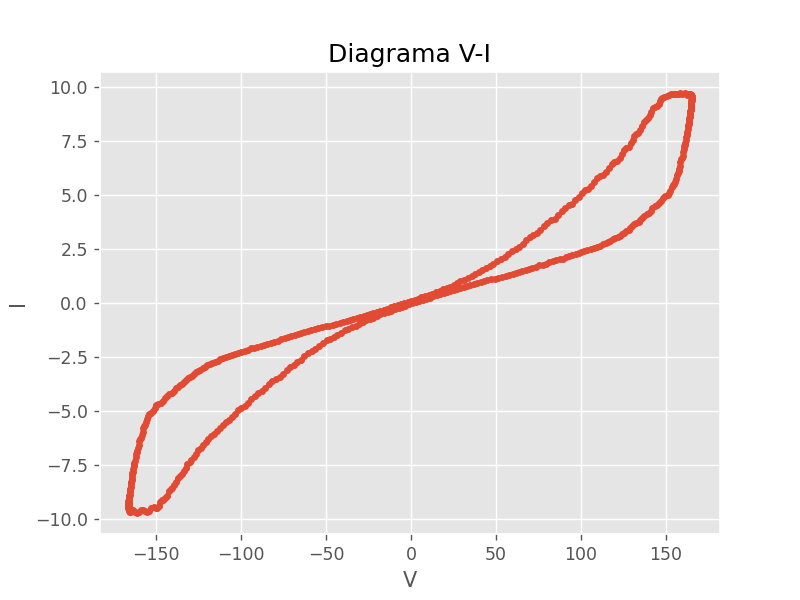

In [34]:
# EXPERIMENTAR medir el desfasaje y comparar contra el cos(phi) calculado.

id_elec = 56  
nombre_de_archivo = get_nombre_archivo(id_elec)

ciclos_a_saltear = 50
ciclos_a_cargar = 1e100
I,V = cargar_VI_por_ciclos(nombre_de_archivo, ciclos_a_saltear=ciclos_a_saltear, ciclos_a_cargar=ciclos_a_cargar)



ciclo_I, ciclo_V = get_ciclo_I_V_promedio_alineado(I,V)
T = generar_vector_tiempo(len(ciclo_I))


P_media = calcular_potencia_media(I,V)

S, S_11, S_H, S_N, P, P_11, P_H, Q_11, D_I, D_V, D_H, N, THD_V, THD_IR = \
calcular_potencia_IEEE_1459_2010(I,V, frecuencia_muestreo=30000, frecuencia_linea=60)




print('-------------------------------------------------------------')
print('Electrodoméstico: id={}, tipo={}:{}'.format(id_elec, get_tipo(id_elec), get_nombre(id_elec)))
print('S={:.2f}, S_11={:.2f}, S_H={:.2f}, S_N={:.2f}, P={:.2f}, P_11={:.2f}, P_H={:.2f}, Q_11={:.2f}, D_I={:.2f}, D_V={:.2f}, D_H={:.2f}, N={:.2f}, THD_V={:.2f}, THD_I={:.2f}'.format(S, S_11, S_H, S_N, P, P_11, P_H, Q_11, D_I, D_V, D_H, N, THD_V, THD_I))
print('Potencia media={:.2f}'.format(P_media) ) 
print('Factor de potencia: total(P/S)={:.3f}, fundamental(P_11/S_11)={:.3f}'.format(P/S, P_11/S_11))


graficar_FI_FV(I,V)

plt.figure()
plt.plot(T,ciclo_I,label='I')
plt.plot(T,ciclo_V/(np.max(ciclo_V)/np.max(ciclo_I)),label='V')
plt.legend()

graficar_diagrama_VI(ciclo_I, ciclo_V)




# DISCUTIR sobre los experimentos de 6.4

Podemos apreciar cambiando el ID de los electrodomésticos que los que tienen su voltaje y corriente menos desfasados tienen mayor factor de potencia tendiendo a uno, mientras que cuanto más desfasadas las señales el factor de potencia tiende a cero. 

Observamos que los electrodomésticos de tipo mayormente inductivo/capacitivo (ej: Microwave), el factor de potencia tiende a cero, mientras que los de tipo resistivo (ej: Heater) el factor de potencia tiende a 1. 

### 6.5 Ubicar los electrodomésticos de la base en el plano P_11-Q_11 y en el plano P-N

In [35]:
# calcular los datos para todos los electrodomésticos

ids = get_ids()

PP_11=np.empty( ( get_cantidad_electrodomesticos() ) )
QQ_11=np.empty( ( get_cantidad_electrodomesticos() ) )

PP=np.empty( ( get_cantidad_electrodomesticos() ) )
NN=np.empty( ( get_cantidad_electrodomesticos() ) )

TIPO=np.empty( ( get_cantidad_electrodomesticos() ) , dtype=np.uint8)
              
for i in range( get_cantidad_electrodomesticos() ):
    id_elec = ids[i][0]
    print('Cargando {:04d}/{:04d}'.format(id_elec, len(ids)), end='\r', flush=True)
    
    I,V = cargar_VI_por_ciclos(get_nombre_archivo(id_elec), 
                               ciclos_a_saltear=50,
                               ciclos_a_cargar=20)
    
    S, S_11, S_H, S_N, P, P_11, P_H, Q_11, D_I, D_V, D_H, N, THD_V, THD_IR = \
            calcular_potencia_IEEE_1459_2010(I,V, frecuencia_muestreo=30000, frecuencia_linea=60)
    
    PP_11[i] = P_11
    QQ_11[i] = Q_11
    
    PP[i] = P
    NN[i] = N
    
    e
    






<ipython-input-26-47b8a5cfc569>:96: RuntimeWarning: invalid value encountered in sqrt
  N = np.sqrt(S**2-P**2)


<IPython.core.display.Javascript object>


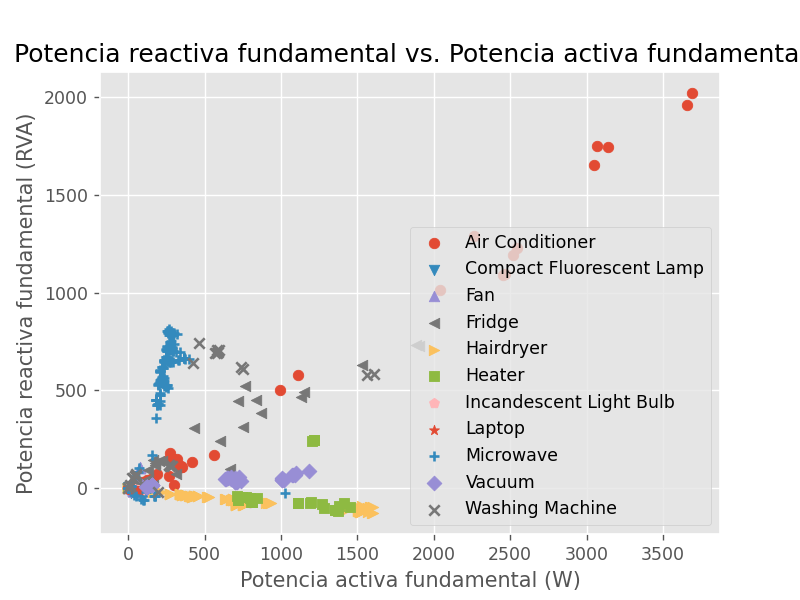

Text(0, 0.5, 'Potencia reactiva fundamental (RVA)')

In [36]:
# Graficar el plano P_11-Q_11

fig, ax = plt.subplots()
markers='ov^<>sp*+Dx'
for i in range(len(nombres_electrodomesticos)):
    label = nombres_electrodomesticos[i]    
    indices = np.where(TIPO==i)[0]
    ax.scatter(PP_11[indices],QQ_11[indices], marker=markers[i],  label=label, cmap='Set1')

ax.legend()
plt.title('Potencia reactiva fundamental vs. Potencia activa fundamental')
plt.xlabel('Potencia activa fundamental (W)')
plt.ylabel('Potencia reactiva fundamental (RVA)')

<IPython.core.display.Javascript object>


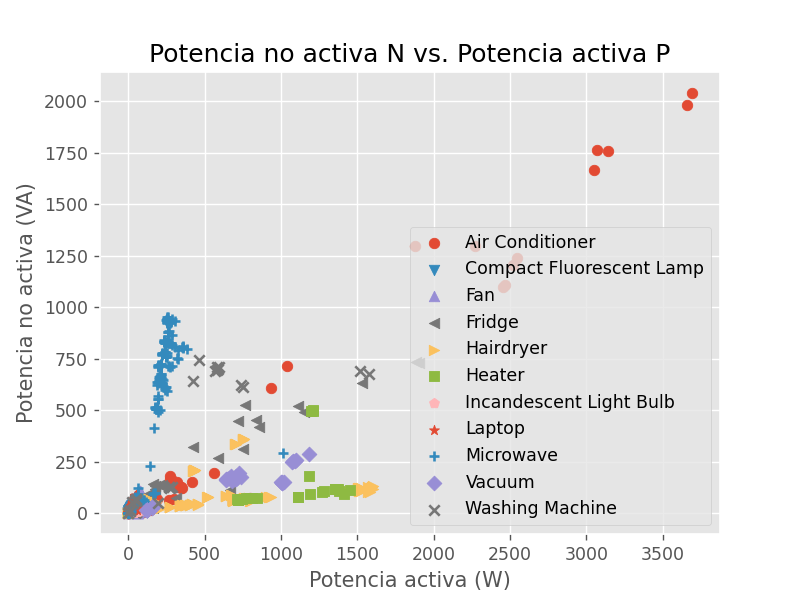

In [37]:
# Graficar el plano P-N

fig, ax = plt.subplots()
markers='ov^<>sp*+Dx'
for i in range(len(nombres_electrodomesticos)):
    label = nombres_electrodomesticos[i]    
    indices = np.where(TIPO==i)[0]
    ax.scatter(PP[indices],NN[indices], marker=markers[i],  label=label, cmap='Set1')

ax.legend()
plt.title('Potencia no activa N vs. Potencia activa P')
plt.xlabel('Potencia activa (W)')
_= plt.ylabel('Potencia no activa (VA)')

### 6.6 Estadísticas del factor de potencia para los distintos tipos de electrodomésticos
Graficar el box-plot del factor de potencia para cada tipo de electrodoméstico.   

Realizar para el factor de potencia total y el fundamental

<IPython.core.display.Javascript object>


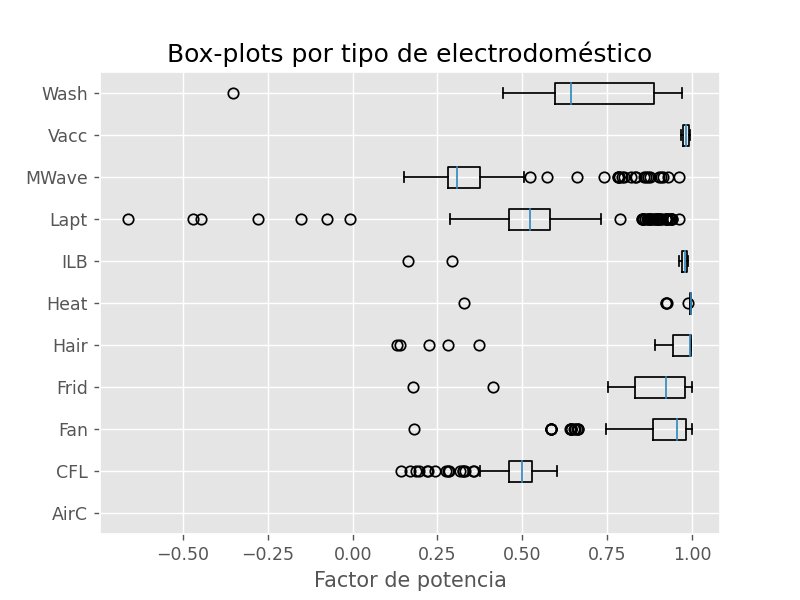

<function matplotlib.pyplot.close(fig=None)>

In [42]:
# COMPLETADO
# graficar los box-plot


factores = []
for i in range(len(nombres_electrodomesticos)):
    aux = []
    for j in get_ids_por_tipo(i):
        costheta = PP[j-1] / np.sqrt(PP[j-1]**2+NN[j-1]**2) #costheta = P / S, S = sqrt(P^2+Q^2)
        aux.append(costheta)
    factores.append(aux)

plt.figure()
plt.title("Box-plots por tipo de electrodoméstico")
plt.xlabel("Factor de potencia")
plt.boxplot(factores, vert=False, labels=nombres_abreviados_electrodomesticos)
plt.close

## Parte 7. Clasificación - primeras ideas
* Mirando el plano P-Q, ¿qué tipos de electrodomésticos le parecen factibles de discriminar en base solamente a la información de P y Q?
* Determine reglas básicas de decisión que permitan separar un tipo o un conjunto de tipos de electrodomésticos en base a P y Q.
* Incluir además de P y Q una característica como la distorsión armónica, ¿podría aportar a la discriminación?
* ¿Qué otras características se podrían extraer de las señales que aporten a la clasificación de tipos?


# DISCUTIR

Observamos que algunos electrodomésticos están más distribuidos en el plano P-Q, mientras que otros se encuentrán más bien agrupados densamente. Al mismo tiempo, hay distintos tipos de electrodomésticos que se encuentran agrupados junto a otros tipos, mientras que algunos se distinguen claramente de los demás. 

Concluímos que lo más fácil de discriminar serían los electrodomésticos que se encuentren agrupados densamente y separados de los otros tipos. El mejor ejemplo de esto son los Microondas. Luego, podríamos separar en grupos de electrodomésticos con características similares, ejemplo: "Hairdryer" y "Heater". Observamos que su posición en el plano PQ es correspondiente a que estos electrodomésticos se componen mayormente de resistencias para generar calor. 

Por otra parte algunos electrodomesticos estan dispersos en el plano con cierta coherencia. Por ejemplo, los aires acondicionados se encuentran todos dispersos sobre una recta que pasa sobre el origen. Esto indica que la relacion entre potencias activa y reactiva es siempre la misma, lo que tambien podria ayudarnos a discriminar este tipo de electrodomesticos. 

Luego, el la parte 5.2 vimos que algunos electrodomésticos tienen porcentualmente mucho más distorsión armónica en la corriente que otros, lo cual está asociado a formas de onda menos regulares. Esto podría usarse para distinguir entre electrodomésticos que estén juntos en el plano P-Q.